# Univariate LSTMs

## Data Preparation

In [1]:
# Univariate Sequence
[10, 20, 30, 40, 50, 60, 70, 80, 90]

[10, 20, 30, 40, 50, 60, 70, 80, 90]

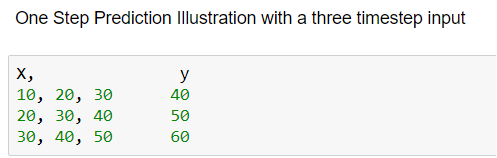

## Sampling a Univariate Sequence

In [38]:
# Import required libraries
from numpy import array
from numpy import hstack
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [3]:
# This is a function to split the univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [4]:
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

In [5]:
# choose a number of time steps
n_steps = 3

In [6]:
# split into samples
X, y = split_sequence(raw_seq, n_steps)

In [7]:
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])

[10 20 30] 40
[20 30 40] 50
[30 40 50] 60
[40 50 60] 70
[50 60 70] 80
[60 70 80] 90


## Modelling Using the Univariate Sequence

Single observation for each time-step

### Vanilla LSTM

This is one that has a single hidden layer of LSTM units and an output layer used for making predictions

In [8]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [9]:
# define model
vanilla_model = Sequential()
vanilla_model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
vanilla_model.add(Dense(1))
vanilla_model.compile(optimizer='adam', loss='mse')

In [10]:
# fit model
vanilla_model.fit(X, y, epochs=200, verbose=0)

In [11]:
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = vanilla_model.predict(x_input, verbose=0)
print(yhat)

[[103.324295]]


### Stacked LSTMs

In [12]:
# define model
stacked_model = Sequential()
stacked_model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
stacked_model.add(LSTM(50, activation='relu'))
stacked_model.add(Dense(1))
stacked_model.compile(optimizer='adam', loss='mse')

In [13]:
# fit model
stacked_model.fit(X, y, epochs=200, verbose=0)

In [14]:
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = stacked_model.predict(x_input, verbose=0)
print(yhat)

[[103.22541]]


### Bi-Directional LSTMs

In [17]:
# define model
bidirectional_model = Sequential()
bidirectional_model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
bidirectional_model.add(Dense(1))
bidirectional_model.compile(optimizer='adam', loss='mse')

In [18]:
# fit model
bidirectional_model.fit(X, y, epochs=200, verbose=0)

In [19]:
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = bidirectional_model.predict(x_input, verbose=0)
print(yhat)

[[102.155426]]


# Multivariate Time Series

Multiple observations in the same time-step

## Data Preparation

In [43]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
    # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [35]:
# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])

In [36]:
# Create the output sequence
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])

In [40]:
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

In [41]:
# Create the dataset by horizontally stacking columns
dataset = hstack((in_seq1, in_seq2, out_seq))
print(dataset)

[[ 10  15  25]
 [ 20  25  45]
 [ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]
 [ 80  85 165]
 [ 90  95 185]]


In [44]:
# choose a number of time steps
n_steps = 3

In [53]:
# convert into input/output
X, y = split_sequences(dataset, n_steps)

In [54]:
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]

In [55]:
print(X.shape, y.shape)

(7, 3, 2) (7,)


In [56]:
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])

[[10 15]
 [20 25]
 [30 35]] 65
[[20 25]
 [30 35]
 [40 45]] 85
[[30 35]
 [40 45]
 [50 55]] 105
[[40 45]
 [50 55]
 [60 65]] 125
[[50 55]
 [60 65]
 [70 75]] 145
[[60 65]
 [70 75]
 [80 85]] 165
[[70 75]
 [80 85]
 [90 95]] 185


## Modelling Using Multivariate Series

Multiple observations for each time-step and can either be ::
1. Multiple Input Series
2. Multiple Parallel Series

### Multiple Input Series

Input

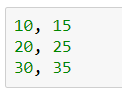

Output

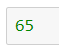

In [58]:
# define model
multi_input_model = Sequential()
multi_input_model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
multi_input_model.add(Dense(1))
multi_input_model.compile(optimizer='adam', loss='mse')

In [59]:
# demonstrate prediction
x_input = array([[80, 85], [90, 95], [100, 105]])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = multi_input_model.predict(x_input, verbose=0)

In [61]:
# fit model
multi_input_model.fit(X, y, epochs=200, verbose=0)

In [62]:
# demonstrate prediction
x_input = array([[80, 85], [90, 95], [100, 105]])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = multi_input_model.predict(x_input, verbose=0)
print(yhat)

[[205.6017]]


### Multiple Parallel Series

Input

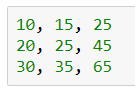

Output

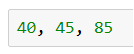

In [63]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [64]:
# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])

In [65]:
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

In [66]:
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))

In [67]:
# choose a number of time steps
n_steps = 3

In [69]:
# convert into input/output
X, y = split_sequences(dataset, n_steps)
print(X.shape, y.shape)

(6, 3, 3) (6, 3)


In [70]:
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])

[[10 15 25]
 [20 25 45]
 [30 35 65]] [40 45 85]
[[20 25 45]
 [30 35 65]
 [40 45 85]] [ 50  55 105]
[[ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]] [ 60  65 125]
[[ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]] [ 70  75 145]
[[ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]] [ 80  85 165]
[[ 60  65 125]
 [ 70  75 145]
 [ 80  85 165]] [ 90  95 185]


## Multi-Step LSTM Models

### Data Preparation

Input

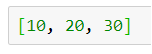

Output

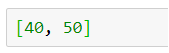

In [73]:
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [74]:
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

In [75]:
# choose a number of time steps
n_steps_in, n_steps_out = 3, 2

In [76]:
# split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)

In [79]:
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])

[10 20 30] [40 50]
[20 30 40] [50 60]
[30 40 50] [60 70]
[40 50 60] [70 80]
[50 60 70] [80 90]


In [80]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [82]:
# define model
multi_step_model = Sequential()
multi_step_model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
multi_step_model.add(LSTM(100, activation='relu'))
multi_step_model.add(Dense(n_steps_out))
multi_step_model.compile(optimizer='adam', loss='mse')

In [83]:
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = multi_step_model.predict(x_input, verbose=0)


In [84]:
print(yhat)

[[1.0586672 0.8937754]]
